In [ ]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt

# Set experiment
mlflow.set_experiment("real_estate_investment")

# Get all runs
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name("real_estate_investment")
runs = client.search_runs(experiment.experiment_id)

print(f"Total Runs: {len(runs)}")

2025/12/17 10:40:33 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/17 10:40:33 INFO mlflow.store.db.utils: Updating database tables
2025/12/17 10:40:33 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/17 10:40:33 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/17 10:40:33 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/17 10:40:33 INFO alembic.runtime.migration: Will assume non-transactional DDL.


📊 Total Runs: 6


In [ ]:
# Ensure mlflow and pandas are imported (in case the earlier cell wasn't executed)
if 'mlflow' not in globals():
    import mlflow
if 'pd' not in globals():
    import pandas as pd

# Extract run data (ensure runs is defined from cell 0)
if 'runs' not in locals():
    client = mlflow.tracking.MlflowClient()
    experiment = client.get_experiment_by_name("real_estate_investment")
    runs = client.search_runs(experiment.experiment_id)

run_data = []

for run in runs:
    run_info = {
        'run_id': run.info.run_id,
        'run_name': run.data.tags.get('mlflow.runName', 'Unknown'),
        'model_type': run.data.params.get('model_type', 'Unknown')
    }
    
    # Add all metrics
    run_info.update(run.data.metrics)
    
    run_data.append(run_info)

df_runs = pd.DataFrame(run_data)
df_runs.head()

,run_id,run_name,model_type,rmse,mae,r2,accuracy,precision,recall,roc_auc
0,610c612bcd4046d7912c0250c47d20a3,Regression_xgb,xgb,8.148174e-01,7.045333e-01,0.999985,NaN,NaN,NaN,NaN
1,dfafc5f24257470f9ed7db60dcaa5322,Regression_rf,rf,3.781064e-02,2.801614e-02,1.000000,NaN,NaN,NaN,NaN
2,b209a204e2874c9a84b0da237d6b0bf0,Regression_lr,lr,5.386500e-12,4.660635e-12,1.000000,NaN,NaN,NaN,NaN
3,8c3f47f936b04b6292ee5487083149be,Classification_xgb,xgb,NaN,NaN,NaN,0.99700,0.997881,0.994195,0.999952
4,b5ca56b3bd194790a0779845352fb470,Classification_rf,rf,NaN,NaN,NaN,0.99724,0.998727,0.993984,0.999756


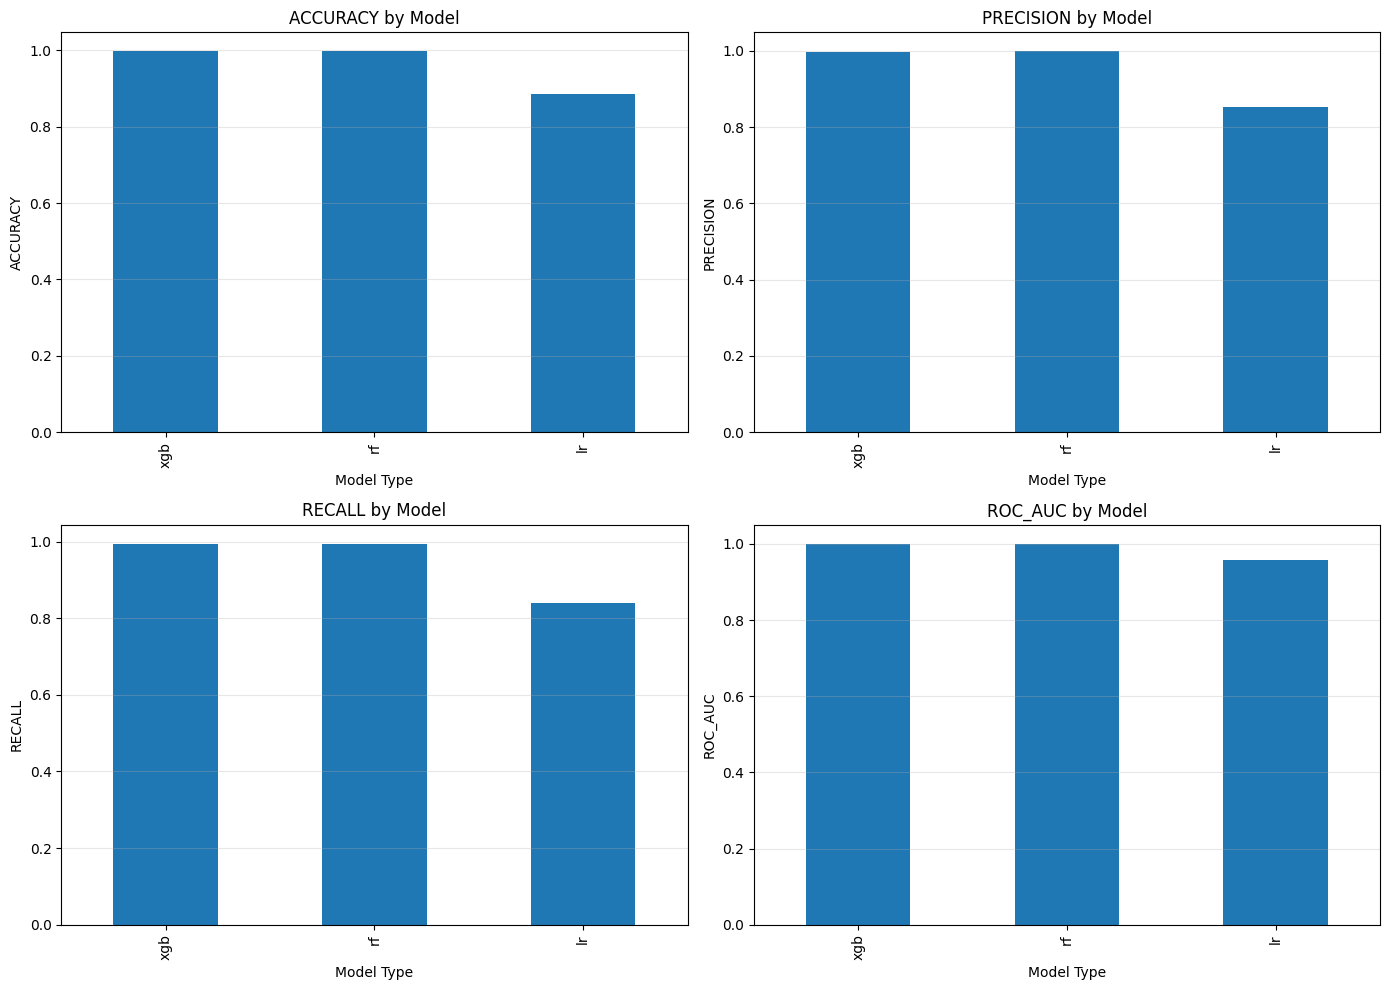

In [ ]:
# Ensure matplotlib is imported
if 'plt' not in globals():
    import matplotlib.pyplot as plt

# Separate classification and regression runs
df_classification = df_runs[df_runs['run_name'].str.contains('Classification')] # pyright: ignore[reportUndefinedVariable]
df_regression = df_runs[df_runs['run_name'].str.contains('Regression')] # pyright: ignore[reportUndefinedVariable]

# Plot classification results
if not df_classification.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc']
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]
        if metric in df_classification.columns:
            df_classification.plot(
                x='model_type',
                y=metric,
                kind='bar',
                ax=ax,
                legend=False
            )
            ax.set_title(f'{metric.upper()} by Model')
            ax.set_xlabel('Model Type')
            ax.set_ylabel(metric.upper())
            ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()